<a href="https://colab.research.google.com/github/vee4n/AI-Phising-Detection/blob/main/AI_Phishing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk
import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Load Datasets and preview email samples
ds = pd.read_csv('/content/email_spam_indo.csv')
ds.head()

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [ ]:
ds.describe()

,Kategori,Pesan
count,2636,2636
unique,2,2620
top,spam,Re: Presentasi ALP FYI Vince - - - - - - - - -...
freq,1368,2


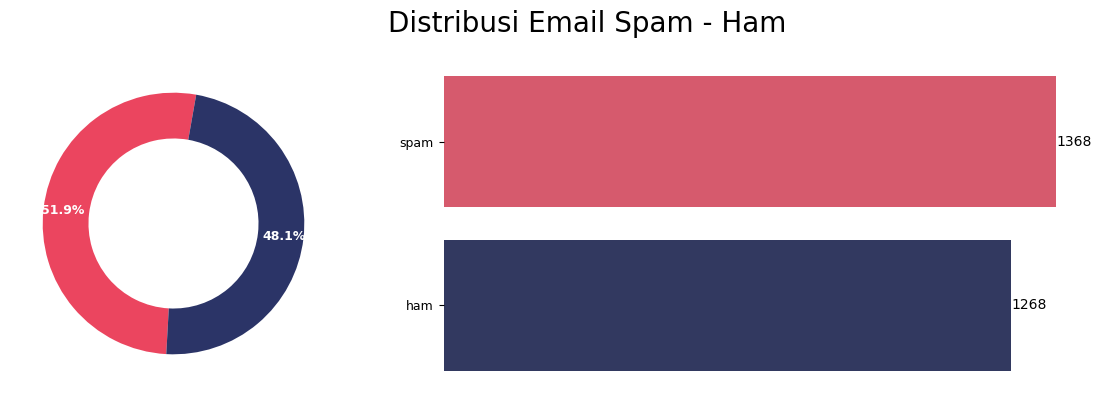

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = ds['Kategori'].value_counts()
labels = value_counts.index.tolist()
colors =["#EB455F", "#2B3467" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=ds, y=ds['Kategori'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Distribusi Email Spam - Ham', fontsize=20)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
#labeling the data as 0 & i.e Spam as 1 & Ham as 0
ds.loc[:,'Kategori']=ds.Kategori.map({'ham':0, 'spam':1})
ds['Kategori'] = ds['Kategori'].astype(int)
ds.head()

,Kategori,Pesan
0,1,Secara alami tak tertahankan identitas perusah...
1,1,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,1,Rumah -rumah baru yang luar biasa menjadi muda...
3,1,4 Permintaan Khusus Pencetakan Warna Informasi...
4,1,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(ds['Pesan'])
x_train, x_test, y_train, y_test = train_test_split(text, ds['Kategori'], test_size=0.30, random_state=100)



In [ ]:
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(1845, 25826)

'X-Test :'

(791, 25826)

'Y-Train :'

(1845,)

'X-Test :'

(791,)

In [ ]:
%%time
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9848293299620733
Precision score: 0.983451536643026
Recall score: 0.9881235154394299
F1 score: 0.9857819905213271
CPU times: user 25.8 ms, sys: 0 ns, total: 25.8 ms
Wall time: 100 ms


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9797724399494311
Precision score: 0.9832935560859188
Recall score: 0.9786223277909739
F1 score: 0.9809523809523809
CPU times: user 22.1 s, sys: 22 s, total: 44.2 s
Wall time: 36.7 s


In [ ]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9671302149178256
Precision score: 0.9438202247191011
Recall score: 0.997624703087886
F1 score: 0.9699769053117783
CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 25.4 ms


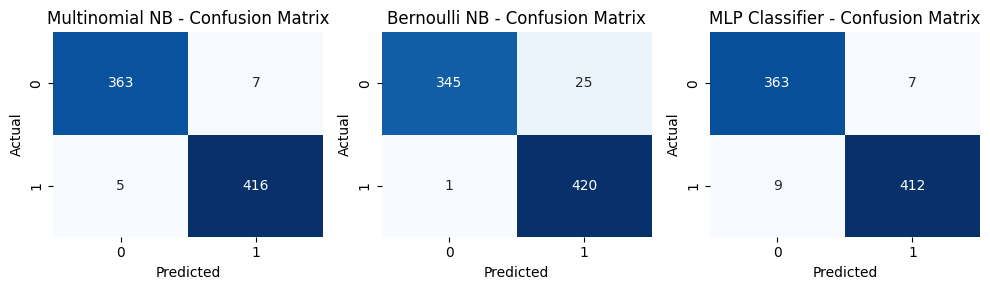

In [ ]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

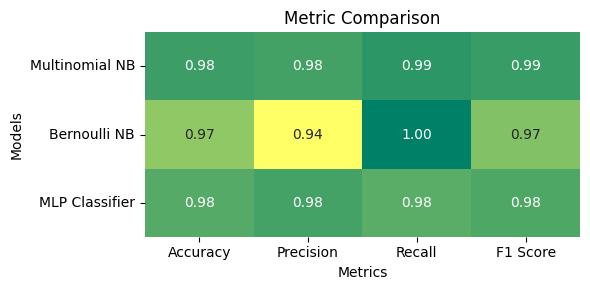

In [ ]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()
